In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

model=SentenceTransformer('all-MiniLM-L6-v2')

In [2]:


sentences=[
    "hopital","physician",
    "Dogs are loyal animals.",
    "The sun rises in the east.",
    "I love eating pizza.",
    "Python is a popular programming language.",
    "The car is parked outside."]

embeddings=model.encode(sentences)
#print(embeddings[0])
print(len(embeddings[0]))


384


In [3]:
query="doctor"
enquery=model.encode(query)
enquery = enquery.reshape(1, -1)
sim=cosine_similarity(enquery,embeddings)[0]
idx=np.argmax(sim)
print(f"Best match: {sentences[idx]}")
print(f"Similarity score: {sim[idx]}")


Best match: physician
Similarity score: 0.8598130941390991


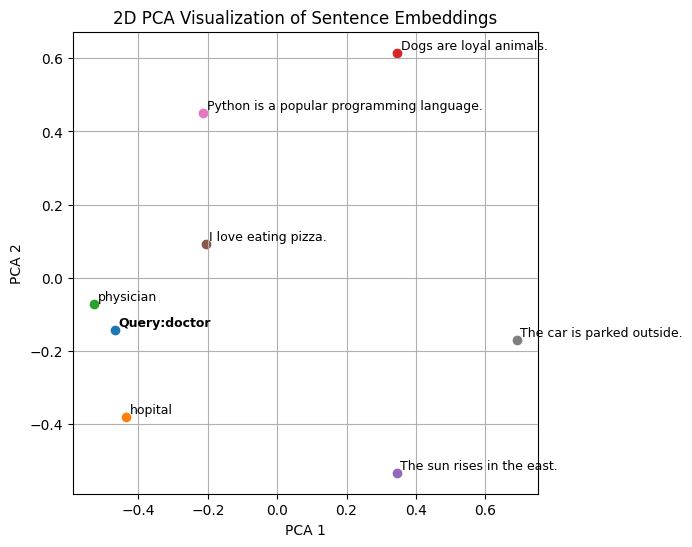

In [7]:
pca=PCA(n_components=2)
embeddings_2d=pca.fit_transform(embeddings)
twoq=pca.transform(enquery)
plt.figure(figsize=(6,6))
x, y = twoq[0]
plt.scatter(x, y)
plt.text(x+0.01, y+0.01, f"Query:{query}", fontsize=9,fontweight="bold")
for i, sentence in enumerate(sentences):
    x, y = embeddings_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, sentence, fontsize=9)
plt.title("2D PCA Visualization of Sentence Embeddings")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()